# Pattern Recognition: Thresholding

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
def otsu_thresholding(image: np.ndarray) -> int:
    """
    Calculate the optimal threshold for an image using Otsu's method.

    Args:
        image (np.ndarray): A grayscale image as a 2D NumPy array.

    Returns:
        int: The optimal threshold value for the input image.
    """
    hist, _ = np.histogram(image.flatten(), bins=256, range=[0, 256])
    prob = hist / hist.sum()

    cumulative_sum = np.cumsum(prob)
    cumulative_mean = np.cumsum(prob * np.arange(256))
    total_mean = cumulative_mean[-1]

    max_var, optimal_threshold = 0, 0
    for t in range(1, 256):
        prob_bg, prob_fg = cumulative_sum[t], 1 - cumulative_sum[t]

        if prob_bg == 0 or prob_fg == 0:
            continue

        mean_bg = cumulative_mean[t] / prob_bg
        mean_fg = (total_mean - cumulative_mean[t]) / prob_fg
        var_between = prob_bg * prob_fg * (mean_bg - mean_fg) ** 2

        if var_between > max_var:
            max_var, optimal_threshold = var_between, t

    return optimal_threshold

In [3]:
def apply_threshold(image: np.ndarray, threshold: int) -> np.ndarray:
    """
    Apply a binary threshold to an image.

    Args:
        image (np.ndarray): A grayscale image as a 2D NumPy array.
        threshold (int): The threshold value.

    Returns:
        np.ndarray: A binary image where pixel values are 0 or 255.
    """
    binary_image = (image > threshold).astype(np.uint8) * 255
    return binary_image

In [4]:
def display_images(original_image: np.ndarray, transformed_image: np.ndarray) -> None:
    """
    Display the original and thresholded images side by side.

    Args:
        original_image (np.ndarray): The original grayscale image.
        transformed_image (np.ndarray): The thresholded binary image.
    """
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(original_image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(transformed_image, cmap='gray')
    plt.title('Thresholded Image (Otsu)')
    plt.axis('off')

    plt.show()

Optimal Threshold: 141


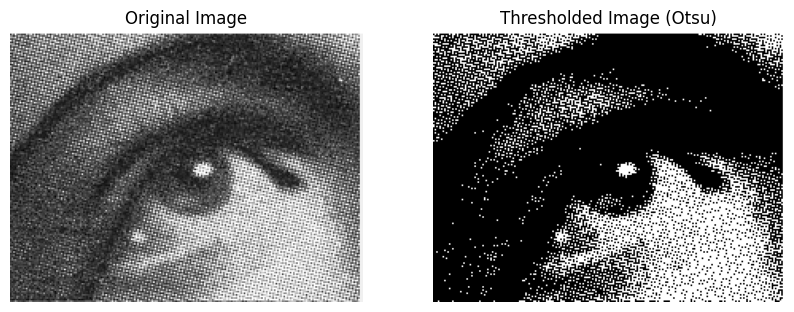

In [5]:
def main() -> None:
    """
    Execute the process of Otsu's thresholding and display the results.
    """
    # Path to the input image
    image_path = "/content/noisy-eye-image.png"

    # Load the image as grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise ValueError(f"Image not found at {image_path}. Please check the path.")

    # Compute the optimal threshold using Otsu's method
    threshold = otsu_thresholding(image)
    print(f"Optimal Threshold: {threshold}")

    # Apply the threshold to the image
    binary_image = apply_threshold(image, threshold)

    # Display the original and thresholded images
    display_images(image, binary_image)

if __name__ == '__main__':
  main()